## Course Assignment Instructions
You should have Python (version 3.8 or later) and Jupyter Notebook installed to complete this assignment. You will write code in the empty cell/cells below the problem. While most of this will be a programming assignment, some questions will ask you to "write a few sentences" in markdown cells. 

Submission Instructions:

Create a labs directory in your personal class repository (e.g., located in your home directory)
Clone the class repository
Copy this Jupyter notebook file (.ipynb) into your repo/labs directory
Make your edits, commit changes, and push to your repository
All submissions must be pushed before the due date to avoid late penalties. 

Labs are graded out of a 100 pts. Each day late is -10. For a max penalty of -50 after 5 days. From there you may submit the lab anytime before the semester ends for a max score of 50.  

Lab 8 is due on 4/28/25

## Model Selection with Three Splits: Select from M models

We employ the diamonds dataset and specify M models nested from simple to more complex. We store the models as strings in a list (i.e. a hashset) ... Create log and polynomial transformations of the following features (carat, x, y, z, depth, and table). In order to use the formulas with logs we need to eliminate rows with zeros in those measurements.

In [1]:
pip install "numpy<2.0"

Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np
print(np.__version__)

1.26.4


In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from plotnine.data import diamonds

# Load the diamonds dataset and create a copy
diamonds = diamonds.copy()

# Filter to remove rows with non-positive values in the specified columns
diamonds_cleaned = diamonds.loc[
    (diamonds["carat"] > 0) &
    (diamonds["x"] > 0) &
    (diamonds["y"] > 0) &
    (diamonds["z"] > 0) &
    (diamonds["depth"] > 0) &
    (diamonds["table"] > 0)     
   ].copy()

# Add polynomial (squared) features
diamonds_cleaned['carat_sq'] = diamonds_cleaned['carat'] ** 2
diamonds_cleaned['x_sq'] = diamonds_cleaned['x'] ** 2
diamonds_cleaned['y_sq'] = diamonds_cleaned['y'] ** 2
diamonds_cleaned['z_sq'] = diamonds_cleaned['z'] ** 2
diamonds_cleaned['depth_sq'] = diamonds_cleaned['depth'] ** 2
diamonds_cleaned['table_sq'] = diamonds_cleaned['table'] ** 2

# Add log-transformed features (add small constant to avoid log(0))
epsilon = 1e-6
diamonds_cleaned['log_carat'] = np.log(diamonds_cleaned['carat'] + epsilon)
diamonds_cleaned['log_x'] = np.log(diamonds_cleaned['x'] + epsilon)
diamonds_cleaned['log_y'] = np.log(diamonds_cleaned['y'] + epsilon)
diamonds_cleaned['log_z'] = np.log(diamonds_cleaned['z'] + epsilon)
diamonds_cleaned['log_depth'] = np.log(diamonds_cleaned['depth'] + epsilon)
diamonds_cleaned['log_table'] = np.log(diamonds_cleaned['table'] + epsilon)

# Model formulas (now referencing the precomputed columns)
model_formulas = [
    "carat",
    "carat + cut",
    "carat + cut + color",
    "carat + cut + color + clarity",
    "carat + cut + color + clarity + x + y + z",
    "carat + cut + color + clarity + x + y + z + depth",
    "carat + cut + color + clarity + x + y + z + depth + table",
    "carat * (cut + color + clarity) + x + y + z + depth + table",
    "(carat + x + y + z) * (cut + color + clarity) + depth + table",
    "(carat + x + y + z + depth + table) * (cut + color + clarity)",
    "(carat_sq + x + y + z + depth + table) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth + table) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z + log_depth) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z + log_depth + log_table) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z + log_depth + log_table) * (cut + color + clarity + carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z + log_depth + log_table)"
]

# Prefix with 'price ~' for statsmodels compatibility
model_formulas = [f"price ~ {f}" for f in model_formulas]

# Number of formulas
M = len(model_formulas)
print(f"Total number of model formulas: {M}")

# Preview
for i, formula in enumerate(model_formulas):
    print(f"{i+1}: {formula}")

Total number of model formulas: 17
1: price ~ carat
2: price ~ carat + cut
3: price ~ carat + cut + color
4: price ~ carat + cut + color + clarity
5: price ~ carat + cut + color + clarity + x + y + z
6: price ~ carat + cut + color + clarity + x + y + z + depth
7: price ~ carat + cut + color + clarity + x + y + z + depth + table
8: price ~ carat * (cut + color + clarity) + x + y + z + depth + table
9: price ~ (carat + x + y + z) * (cut + color + clarity) + depth + table
10: price ~ (carat + x + y + z + depth + table) * (cut + color + clarity)
11: price ~ (carat_sq + x + y + z + depth + table) * (cut + color + clarity)
12: price ~ (carat_sq + x_sq + y_sq + z_sq + depth + table) * (cut + color + clarity)
13: price ~ (carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq) * (cut + color + clarity)
14: price ~ (carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z) * (cut + color + clarity)
15: price ~ (carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + lo

In [3]:

df = diamonds.copy()
filter_column = ["carat", "x", "y", "z", "depth", "table"]
mask = (df[filter_column] > 0).all(axis = 1)
df = df.loc[mask].copy()

for col in filter_column:
    df[f"{col}_sq"] = df[col] ** 2

for col in filter_column:
    df[f"log_{col}"] = np.log(df[col] + epsilon)

print(f"Total formula: {len(model_formulas)}" )
# Preview
for i, formula in enumerate(model_formulas, 1):
    print(f"{i}: {formula}")



Total formula: 17
1: price ~ carat
2: price ~ carat + cut
3: price ~ carat + cut + color
4: price ~ carat + cut + color + clarity
5: price ~ carat + cut + color + clarity + x + y + z
6: price ~ carat + cut + color + clarity + x + y + z + depth
7: price ~ carat + cut + color + clarity + x + y + z + depth + table
8: price ~ carat * (cut + color + clarity) + x + y + z + depth + table
9: price ~ (carat + x + y + z) * (cut + color + clarity) + depth + table
10: price ~ (carat + x + y + z + depth + table) * (cut + color + clarity)
11: price ~ (carat_sq + x + y + z + depth + table) * (cut + color + clarity)
12: price ~ (carat_sq + x_sq + y_sq + z_sq + depth + table) * (cut + color + clarity)
13: price ~ (carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq) * (cut + color + clarity)
14: price ~ (carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z) * (cut + color + clarity)
15: price ~ (carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x +

In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,...,y_sq,z_sq,depth_sq,table_sq,log_carat,log_x,log_y,log_z,log_depth,log_table
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,15.8404,5.9049,3782.25,3025.0,-1.469672,1.373716,1.381282,0.887892,4.119037,4.007333
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,14.7456,5.3361,3576.04,3721.0,-1.560643,1.358409,1.345473,0.837248,4.091006,4.110874
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,16.5649,5.3361,3237.61,4225.0,-1.469672,1.398717,1.403643,0.837248,4.041295,4.174387
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,17.8929,6.9169,3893.76,3364.0,-1.237871,1.435085,1.442202,0.966984,4.133565,4.060443
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,18.9225,7.5625,4006.89,3364.0,-1.171180,1.467875,1.470176,1.011601,4.147885,4.060443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,33.1776,12.2500,3696.64,3249.0,-0.328503,1.749200,1.750938,1.252763,4.107590,4.043051
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,33.0625,13.0321,3981.61,3025.0,-0.328503,1.738710,1.749200,1.283708,4.144721,4.007333
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,32.2624,12.6736,3943.84,3600.0,-0.356674,1.733424,1.736951,1.269761,4.139955,4.094345
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,37.4544,13.9876,3721.00,3364.0,-0.150822,1.816452,1.811562,1.319086,4.110874,4.060443


Split the data into train, select and test. Each set should have 1/3 of the total data.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split


# First split: ~1/3 (train), ~2/3 (temp)
diamonds_train, temp = train_test_split(diamonds_cleaned, test_size= 2/3, random_state=1)

# Second split: from temp, split half (~1/3 overall) for select and half (~1/3 overall) for test
diamonds_select, diamonds_test = train_test_split(temp, test_size= 1/2, random_state=1)

print(f"Train size:  {len(diamonds_train)}")
print(f"Select size: {len(diamonds_select)}")
print(f"Test size:   {len(diamonds_test)}")

Train size:  17973
Select size: 17973
Test size:   17974


Find the oosRMSE on the select set for each model. Save the number of df in each model while you're doing this as we'll need it for later

In [6]:
results_list = []

for i, formula in enumerate(model_formulas, start=1):
    #Fit on train
    model = smf.ols(formula = formula, data = diamonds_train).fit()
    #Predict on select
    preds = model.predict(diamonds_select)
    
    #Compute oosRMSE
    actual = diamonds_select['price']
    rmse = np.sqrt(np.mean((preds - actual) ** 2))
    
    #Degrees of freedom
    #number of parameters
    df_params = len(model.params)

    #Store results
    results_list.append({'model_index': i, 'formula': formula, 'oosRMSE': rmse, 'df': df_params})


results_df = pd.DataFrame(results_list)
print(results_df)

    model_index                                            formula  \
0             1                                      price ~ carat   
1             2                                price ~ carat + cut   
2             3                        price ~ carat + cut + color   
3             4              price ~ carat + cut + color + clarity   
4             5  price ~ carat + cut + color + clarity + x + y + z   
5             6  price ~ carat + cut + color + clarity + x + y ...   
6             7  price ~ carat + cut + color + clarity + x + y ...   
7             8  price ~ carat * (cut + color + clarity) + x + ...   
8             9  price ~ (carat + x + y + z) * (cut + color + c...   
9            10  price ~ (carat + x + y + z + depth + table) * ...   
10           11  price ~ (carat_sq + x + y + z + depth + table)...   
11           12  price ~ (carat_sq + x_sq + y_sq + z_sq + depth...   
12           13  price ~ (carat_sq + x_sq + y_sq + z_sq + depth...   
13           14  pri

Plot the oosRMSE by model complexity (df in model)

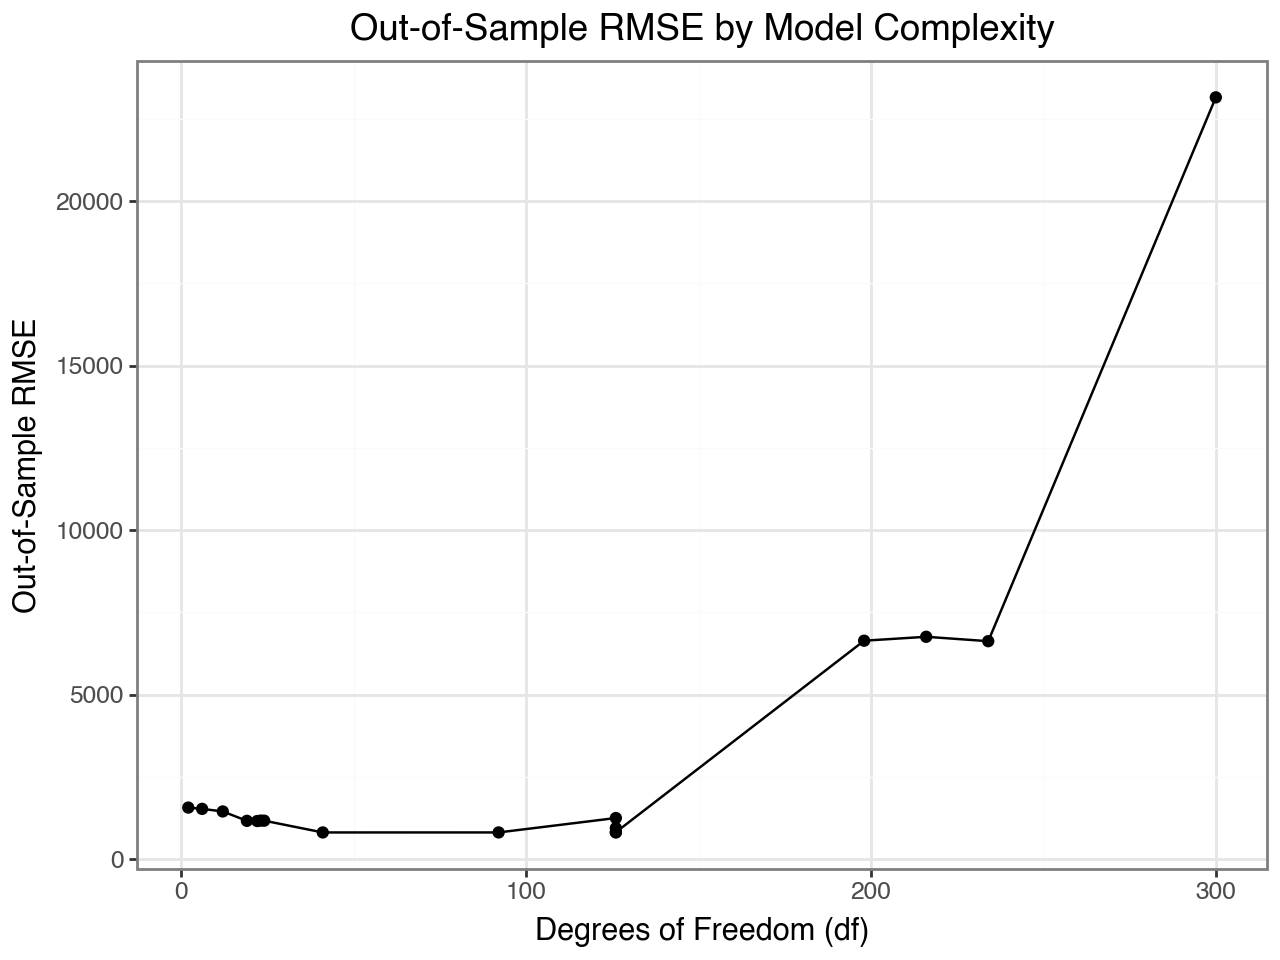

In [7]:
from plotnine import ggplot, aes, geom_point, geom_line, theme_bw, labs


plot = (ggplot(results_df, aes(x='df', y='oosRMSE')) +
     geom_point() + 
     geom_line() + 
     labs(title="Out-of-Sample RMSE by Model Complexity", x="Degrees of Freedom (df)", y="Out-of-Sample RMSE") +
     theme_bw())

plot

Select the best model by oosRMSE and find its oosRMSE on the test set.

In [8]:
#Identify best model by oosRMSE
best_row = results_df.loc[results_df['oosRMSE'].idxmin()]
best_formula = best_row['formula']

print("Best model row:\n", best_row)
print("Best model formula:", best_formula)

#Fit the best model on train
best_model = smf.ols(formula=best_formula, data=diamonds_train).fit()

#Evaluate RMSE on the test set
preds_test = best_model.predict(diamonds_test)
test_actual = diamonds_test['price']
test_oosRMSE = np.sqrt(np.mean((preds_test - test_actual)**2))

print("oosRMSE on the test set:", test_oosRMSE)

Best model row:
 model_index                                                    8
formula        price ~ carat * (cut + color + clarity) + x + ...
oosRMSE                                                808.68638
df                                                            41
Name: 7, dtype: object
Best model formula: price ~ carat * (cut + color + clarity) + x + y + z + depth + table
oosRMSE on the test set: 782.4009176885938


Did we overfit the select set? Discuss why or why not.

We don't overfit because the RMSE of test is lower than oosRMSEs which is RMSE from Select data set.

Create the final model object `g_final`.

In [9]:
#Identify best formula
best_row = results_df.loc[results_df['oosRMSE'].idxmin()]
best_formula = best_row['formula']
print("Best formula:", best_formula)

#Combine train and select data
diamonds_train_select = pd.concat([diamonds_train, diamonds_select], ignore_index=True)

#Fit final model on train+select
g_final = smf.ols(formula=best_formula, data=diamonds_train_select).fit()

#Evaluate on test
test_preds = g_final.predict(diamonds_test)
test_actual = diamonds_test["price"]
test_oosRMSE = np.sqrt(np.mean((test_preds - test_actual)**2))

print("Final model trained on train+select data.")
print("oosRMSE on Test Set:", test_oosRMSE)

Best formula: price ~ carat * (cut + color + clarity) + x + y + z + depth + table
Final model trained on train+select data.
oosRMSE on Test Set: 782.1250622414229


## Model Selection with Three Splits: Hyperparameter selection

We will use an algorithm that I historically taught in 324W but now moved to 343 so I can teach it more deeply using the Bayesian topics from 341. The regression algorithm is called "ridge" and it involves solving for the slope vector via:

b_ridge := (X^T X + lambda I_(p+1))^-1 X^T y

Note how if lambda = 0, this is the same algorithm as OLS. If lambda becomes very large then b_ridge is pushed towards all zeroes. So ridge is good at weighting only features that matter.

However, lambda is a hyperparameter >= 0 that needs to be selected.

We will work with the boston housing dataset except we will add 250 garbage features consisting of iid N(0,1) realizations. We will also standardize the columns so they're all xbar = 0 and s_x = 1. This is shown to be important in 343.

In [1]:
import statsmodels.api as sm

#Read the Boston Housing CSV (exported from R)
df = pd.read_csv('boston_housing_data.csv')

#y is the response
y = df['medv'].values

#X_data: mimic model.matrix(medv ~ ., MASS::Boston):
# Drop 'medv' and add an intercept column
X_data = df.drop(columns='medv')
X_data_with_const = sm.add_constant(X_data, has_constant='add')

#Add 250 garbage features
np.random.seed(1)
n = X_data_with_const.shape[0]
p_garbage = 250
garbage_matrix = np.random.randn(n, p_garbage)

# Combine the real predictors + garbage into a single DataFrame
df_X = pd.concat([pd.DataFrame(X_data_with_const), pd.DataFrame(garbage_matrix)], axis = 1)

#Standardize each column: (x_j - mean_j)/sd_j, matching R's default sample sd (ddof=1)
means = df_X.mean(axis = 0)
stds  = df_X.std(axis = 0, ddof=1)
df_X_std = (df_X - means)/stds

#The first column is our intercept, but standardizing sets it to 0, so reset it to 1
df_X_std.iloc[:, 0] = 1.0

#Name the columns
orig_columns = ["Intercept"] + list(X_data.columns)
garb_columns = [f"garb_{i+1}" for i in range(p_garbage)]
df_X_std.columns = orig_columns + garb_columns

# 7) df_X_final is now your final DataFrame of predictors
df_X_final = df_X_std.copy()

print("df_X_final shape:", df_X_final.shape)
print("First 5 rows:\n", df_X_final.head())

NameError: name 'pd' is not defined

Now we split it into 300 train, 100 select and 106 test. 

In [11]:
from sklearn.model_selection import train_test_split

# First split: 300 for train, remainder (206) for temp
X_train, X_temp, y_train, y_temp = train_test_split(
    df_X_final,
    y,
    test_size= 206,
    random_state= 1
)

#From the remaining 206, split out 100 for select and 106 for test
X_select, X_test, y_select, y_test = train_test_split(
   X_temp,
   y_temp,
   test_size = 106,
   random_state= 1
)

#Print shapes to verify (should be 300 / 100 / 106)
print("Train set X:", X_train.shape, "y:", y_train.shape)
print("Select set X:", X_select.shape , "y:", y_select.shape)
print("Test set X:  ", X_test.shape,  "y:", y_test.shape)

Train set X: (300, 264) y: (300,)
Select set X: (100, 264) y: (100,)
Test set X:   (106, 264) y: (106,)


We now create a grid of M = 200 models indexed by lambda. The lowest lambda should be zero (which is OLS) and the highest lambda can be 100.

In [12]:
M = 200
lambda_grid = np.linspace(0, 100, num=M)

Now find the oosRMSE on the select set on all models each with their own lambda value.

In [13]:
import numpy as np
from sklearn.linear_model import Ridge
# Suppose:
#   X_train, y_train  # training arrays/dataframes
#   X_select, y_select  # select arrays/dataframes
#   lambda_grid: np.linspace(0, 100, num=200)  # for instance

M = len(lambda_grid)
oosRMSE_list = []

for lam in lambda_grid:
    # 1) Fit a Ridge regression model with alpha=lam
    #    alpha here corresponds to lambda in R
    ridge_model = Ridge(alpha=lam, fit_intercept=False)
    # If your X_train does NOT have an intercept column, set fit_intercept=True instead.
    # But if you already have an intercept in X_train, set fit_intercept=False.

    ridge_model.fit(X_train, y_train)
    
    # 2) Predict on the select set
    preds = ridge_model.predict(X_select)
    
    # 3) Compute out-of-sample RMSE
    mse = np.mean((preds - y_select)**2)
    rmse = np.sqrt(mse)
    oosRMSE_list.append(rmse)

oosRMSE_array = np.array(oosRMSE_list)
print(oosRMSE_array)

[13.53734094 12.44441538 11.76392353 11.30554565 10.98137582 10.74410092
 10.56595405 10.42963657 10.32386718 10.24101089 10.17573733 10.12422462
 10.08366818 10.05196758 10.02752098 10.00908688  9.995689    9.98654941
  9.9810409   9.97865219  9.97896241  9.98162195  9.98633795  9.99286321
 10.00098758 10.01053128 10.02133949 10.03327821 10.0462308  10.06009525
 10.07478194 10.09021179 10.10631473 10.12302846 10.14029738 10.1580717
 10.1763067  10.19496209 10.21400147 10.23339187 10.25310335 10.27310866
 10.29338294 10.31390345 10.33464937 10.35560158 10.37674252 10.39805598
 10.41952704 10.44114188 10.46288774 10.48475277 10.50672598 10.52879716
 10.55095682 10.5731961  10.59550674 10.61788106 10.64031184 10.66279236
 10.68531631 10.70787778 10.73047125 10.75309151 10.77573368 10.79839317
 10.82106567 10.84374712 10.86643371 10.88912182 10.91180806 10.93448925
 10.95716234 10.97982451 11.00247305 11.02510543 11.04771925 11.07031223
 11.09288224 11.11542725 11.13794533 11.16043468 11.

Plot the oosRMSE by the value of lambda.

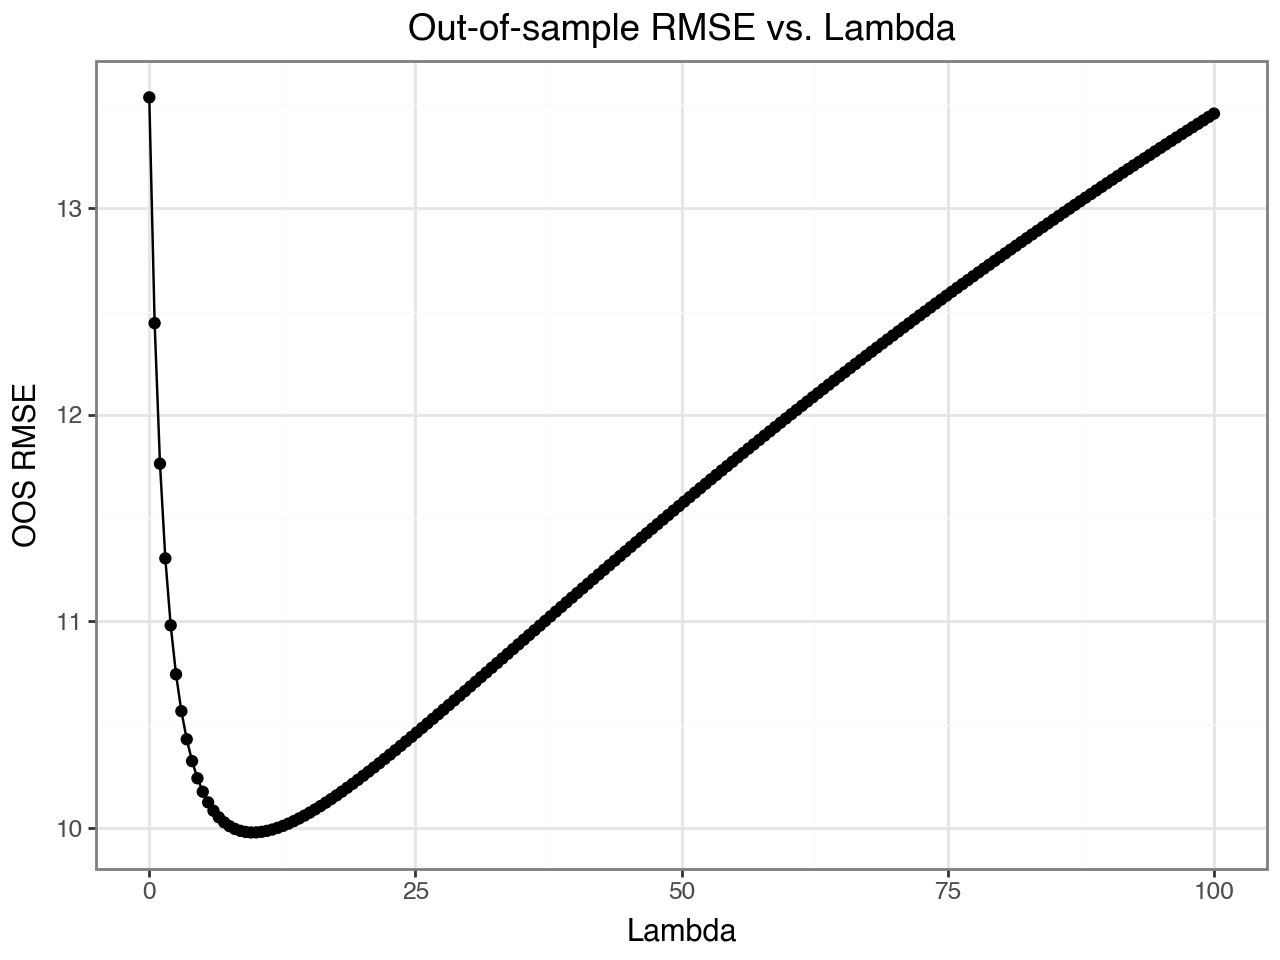

In [14]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_bw

results_df = pd.DataFrame({
    'lambda': lambda_grid,
    'oosRMSE': oosRMSE_array
})

plot = (ggplot(results_df, aes(x='lambda', y='oosRMSE'))
        + geom_point()
        + geom_line()
        + labs(title="Out-of-sample RMSE vs. Lambda", x="Lambda", y="OOS RMSE")
        + theme_bw())
plot

Select the model with the best oosRMSE on the select set and find its oosRMSE on the test set.

In [15]:
#Identify the best lambda (lowest oosRMSE on the select set)
best_idx = np.argmin(oosRMSE_array)
best_lambda = lambda_grid[best_idx]
print("Best lambda:", best_lambda)

#Refit on train set with that lambda
ridge_best = Ridge(alpha = best_lambda, fit_intercept=False)
ridge_best.fit(X_train, y_train)

#Evaluate on the test set
preds_test = ridge_best.predict(X_test)
test_oosRMSE = np.sqrt(np.mean((preds_test - y_test)**2))
print("Test-set RMSE:", test_oosRMSE)

Best lambda: 9.547738693467336
Test-set RMSE: 10.46084911443452


Create the final model object `g_final`.

In [16]:
# Convert X_train to DataFrame if needed (preserve columns if they exist, otherwise create generic ones)
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=[f"X{i}" for i in range(X_train.shape[1])])
if not isinstance(X_select, pd.DataFrame):
    X_select = pd.DataFrame(X_select, columns=X_train.columns)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)

#Convert y_train, y_select, and y_test to Series if needed
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name="y")
if not isinstance(y_select, pd.Series):
    y_select = pd.Series(y_select, name="y")
if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test, name="y")

#Combine the train and select sets (keeping them as DataFrames/Series)
X_train_select = pd.concat([X_train, X_select], axis=0)
y_train_select = pd.concat([y_train, y_select], axis = 0)

# Fit the final Ridge model on the combined train+select data. X_train_select already includes an intercept column
ridge_final = Ridge(alpha = best_lambda, fit_intercept=False)
ridge_final.fit(X_train_select, y_train_select)
g_final = ridge_final  # final model object

# Display the final model coefficients with their feature names.
coef_series = pd.Series(g_final.coef_, index = X_train_select.columns)
print("Final model coefficients:")
print(coef_series)

# Evaluate on the test set (which is also a DataFrame)
preds_test = g_final.predict(X_test)
test_oosRMSE = np.sqrt(np.mean((preds_test - y_test)**2))
print("Test-set RMSE:", test_oosRMSE)

Final model coefficients:
Intercept    21.888387
crim         -0.440957
zn            1.659766
indus         0.482797
chas          0.598480
               ...    
garb_246     -0.020711
garb_247     -0.639872
garb_248     -0.118778
garb_249     -0.075556
garb_250     -0.154029
Length: 264, dtype: float64
Test-set RMSE: 8.517922621131959


## Model Selection with Three Splits: Forward stepwise modeling

We will use the adult data

In [1]:
import pandas as pd
import numpy as np
#Import the data from the CSV file
adult = pd.read_csv("adult_data.csv")

#Remove observations with any missing values (similar to na.omit in R)
adult = adult.dropna()

#Check the number of observations
n = adult.shape[0]

print("Number of observations after dropping missing values:", n)

#Remove the "education" column (which is duplicative with education-num)
if "education" in adult.columns:
    adult = adult.drop(columns=["education"])
else:
    print("Column 'education' not found; please check column names.")

p = adult.shape[1]
print("Number of features after dropping education:", p)

#Inspect the first few rows
print(adult.head())

Number of observations after dropping missing values: 30162
Number of features after dropping education: 14
   age         workclass  fnlwgt  education_num      marital_status  \
0   39         State-gov   77516             13       Never-married   
1   50  Self-emp-not-inc   83311             13  Married-civ-spouse   
2   38           Private  215646              9            Divorced   
3   53           Private  234721              7  Married-civ-spouse   
4   28           Private  338409             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital_gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital_loss  hours_per_week native_country income  


To implement forward stepwise, we need a "full model" that contains anything and everything we can possible want to use as transformed predictors. Let's first create log features of all the numeric features. Instead of pure log, use log(value + epsilon) to handle possible zeroes.

In [2]:
# Create log-transformed features (using log(value + 1) to avoid issues with zero values)
adult['log_age'] = np.log(adult['age'] + 1)
adult['log_fnlwgt'] = np.log(adult['fnlwgt'] + 1)
adult['log_education_num'] = np.log(adult['education_num'] + 1)
adult['log_capital_gain'] = np.log(adult['capital_gain'] + 1)
adult['log_capital_loss'] = np.log(adult['capital_loss'] + 1)
adult['log_hours_per_week'] = np.log(adult['hours_per_week'] + 1)

# Optionally, inspect the first few rows to confirm the new columns
print(adult.head())

   age         workclass  fnlwgt  education_num      marital_status  \
0   39         State-gov   77516             13       Never-married   
1   50  Self-emp-not-inc   83311             13  Married-civ-spouse   
2   38           Private  215646              9            Divorced   
3   53           Private  234721              7  Married-civ-spouse   
4   28           Private  338409             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital_gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital_loss  hours_per_week native_country income   log_age  log_fnlwgt  \
0             0              40  United-States  <=50K  3.688879   11.258253   
1     

Now let's create a model matrix Xfull that contains all first order interactions. How many degrees of freedom in this "full model"?

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

#Binarize income into y
y = (adult['income'].str.strip() == ">50K").astype(int)

#Drop income from the features
adult_feat = adult.drop(columns=["income"])

#Split into numeric vs. categorical
numeric_cols = adult_feat.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = adult_feat.select_dtypes(include=["object", "category"]).columns.tolist()

#Dummy‐encode categoricals (k-1 dummies per factor)
X_num = adult_feat[numeric_cols]
X_cat = pd.get_dummies(adult_feat[categorical_cols], drop_first=True)

#Assemble full main-effects matrix
X_main = pd.concat([X_num, X_cat], axis=1)

#Build all degree-2 polynomial features (intercept + mains + interactions + squares)
pf = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
Xfull_array = pf.fit_transform(X_main)
try:
    feature_names = pf.get_feature_names_out(X_main.columns)
except AttributeError:
    feature_names = pf.get_feature_names(X_main.columns)

Xfull = pd.DataFrame(Xfull_array, columns=feature_names)

#Report shapes
print("Shape of Xmain (n × p):", X_main.shape)
print("Shape of Xfull (n × df):", Xfull.shape)
print("Degrees of freedom in the full model (including intercept):", Xfull.shape[1])

Shape of Xmain (n × p): (30162, 87)
Shape of Xfull (n × df): (30162, 3916)
Degrees of freedom in the full model (including intercept): 3916


Now let's split it into train, select and test sets. Because this will be a glm, model-building (training) will be slow, so let's keep the training set small at 2,000. Since prediction is fast, we can divide the others evenly among select and test.

In [4]:
from sklearn.model_selection import train_test_split


#Split off a training set of exactly 2,000 observations
X_train, X_temp, y_train, y_temp = train_test_split(
    Xfull,
    y,
    train_size=2000,
    random_state=42,     # for reproducibility
    stratify=y           # preserves class balance in y
)

#Split the remainder evenly into "select" and "test" sets
X_select, X_test, y_select, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,       # half of the leftover goes to test, half to select
    random_state=42,     # same seed to keep things consistent
    stratify=y_temp      # preserves class balance in the remaining data
)

#Inspect the shapes
print("Training set:", X_train.shape, y_train.shape)
print("Select set:  ", X_select.shape, y_select.shape)
print("Test set:    ", X_test.shape, y_test.shape)

Training set: (2000, 3916) (2000,)
Select set:   (14081, 3916) (14081,)
Test set:     (14081, 3916) (14081,)


Now let's use the code from class to run the forward stepwise modeling. As this is binary classification, let's use logistic regression and to measure model performance, let's use the Brier score. Compute the Brier score in-sample (on training set) and oos (on selection set) for every iteration of j, the number of features selected from the greedy selection procedure.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss
from joblib import Parallel, delayed

#Scale features once
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_select_scaled = scaler.transform(X_select)
#Keep DataFrame structure if you like:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_select_scaled = pd.DataFrame(X_select_scaled, columns=X_select.columns, index=X_select.index)

#Prepare feature lists
selected_features  = []
remaining_features = list(X_train_scaled.columns)

train_brier_scores  = []
select_brier_scores = []

# Optional: cap how many features to select for speed
max_steps = 50
n_steps = min(len(remaining_features), max_steps)

#Forward‐stepwise with parallel inner loop
for j in range(1, n_steps + 1):
    #Evaluate each candidate in parallel
    def eval_feature(feat):
        feats = selected_features + [feat]
        model = LogisticRegression(solver='liblinear', max_iter=500)
        model.fit(X_train_scaled[feats], y_train)
        p_tr = model.predict_proba(X_train_scaled[feats])[:, 1]
        return feat, brier_score_loss(y_train, p_tr), model

    results = Parallel(n_jobs=-1)(
        delayed(eval_feature)(feat) for feat in remaining_features
    )

    #Pick the best feature (lowest in‐sample Brier)
    best_feat, best_train_brier, best_model = min(results, key=lambda x: x[1])

    #Update lists
    selected_features.append(best_feat)
    remaining_features.remove(best_feat)
    train_brier_scores.append(best_train_brier)

    #Compute select‐set Brier using the chosen model
    p_sel = best_model.predict_proba(X_select_scaled[selected_features])[:, 1]
    select_brier_scores.append(brier_score_loss(y_select, p_sel))

    print(f"Step {j:2d}: added '{best_feat}' → "
          f"Train Brier = {best_train_brier:.4f}, "
          f"Select Brier = {select_brier_scores[-1]:.4f}")

#Compile results
import pandas as pd

results = pd.DataFrame({
    'step':          range(1, len(train_brier_scores) + 1),
    'feature_added': selected_features,
    'train_brier':   train_brier_scores,
    'select_brier':  select_brier_scores
})

print("\nForward stepwise selection results:")
print(results)

Step  1: added 'education_num marital_status_Married-civ-spouse' → Train Brier = 0.1335, Select Brier = 0.1314
Step  2: added 'capital_gain hours_per_week' → Train Brier = 0.1191, Select Brier = 0.1193
Step  3: added 'log_age log_education_num' → Train Brier = 0.1133, Select Brier = 0.1143
Step  4: added 'capital_loss marital_status_Married-civ-spouse' → Train Brier = 0.1094, Select Brier = 0.1143
Step  5: added 'hours_per_week log_fnlwgt' → Train Brier = 0.1077, Select Brier = 0.1127
Step  6: added 'fnlwgt occupation_Prof-specialty' → Train Brier = 0.1064, Select Brier = 0.1132
Step  7: added 'log_age occupation_Exec-managerial' → Train Brier = 0.1050, Select Brier = 0.1111
Step  8: added 'marital_status_Married-civ-spouse race_White' → Train Brier = 0.1041, Select Brier = 0.1117
Step  9: added 'fnlwgt occupation_Farming-fishing' → Train Brier = 0.1031, Select Brier = 0.1109
Step 10: added 'occupation_Prof-specialty native_country_United-States' → Train Brier = 0.1023, Select Brier = 

KeyboardInterrupt: 

Plot the in-sample Brier score (in red) and oos Brier score (in blue) by the number of features used.

In [8]:
from plotnine import ggplot, aes, geom_line, geom_point, scale_color_manual, labs, theme_minimal


#Melt results into long form
results_long = pd.melt(
    results,
    id_vars='step',
    value_vars=['train_brier', 'select_brier'],
    var_name='set',
    value_name='brier_score'
)

#Rename factor levels for clarity
results_long['set'] = results_long['set'].map({
    'train_brier': 'In-sample',
    'select_brier': 'OOS'
})

#Plot
plot = (ggplot(results_long, aes(x='step', y='brier_score', color='set')) + 
        geom_line(size=1) + 
        geom_point(size=2) + 
        scale_color_manual(values={'In-sample': 'red', 'OOS': 'blue'}, name='Dataset') + 
        labs(x='Number of Features Selected', y='Brier Score', title='Brier Score vs. Number of Features') + 
        theme_minimal())
plot

AttributeError: 'list' object has no attribute 'columns'

Select the model with the best oos Brier score on the select set and find its oos Brier score on the test set.

In [ ]:
from sklearn.metrics import brier_score_loss
from sklearn.linear_model import LogisticRegression
import pandas as pd

#Binarize y_test and scale X_test
y_test_bin = (y_test == 1).astype(int)   # or (y_test == '>50K').astype(int)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns, index=X_test.index
)

#Find the step with the lowest OOS Brier on the select set
best_idx   = results['select_brier'].idxmin()
best_step  = int(results.loc[best_idx, 'step'])
best_brier = results.loc[best_idx, 'select_brier']
print(f"Best select‐set Brier = {best_brier:.4f} at step {best_step}")

#Reconstruct the feature list for that step
best_features = results.loc[
    results['step'] <= best_step,
    'feature_added'
].tolist()

#Retrain the model on the training set with those features
best_model = LogisticRegression(solver='liblinear', max_iter=500)
best_model.fit(X_train_scaled[best_features], y_train_bin)

#Compute the Brier score on the test set
p_test     = best_model.predict_proba(X_test_scaled[best_features])[:, 1]
test_brier = brier_score_loss(y_test_bin, p_test)
print(f"Test‐set Brier score for best model: {test_brier:.4f}")

-1.9989040104148214e-08


Create the final model object `g_final`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss, classification_report, roc_auc_score

#Find the step with the lowest OOS Brier on the select set
best_idx  = results['select_brier'].idxmin()
best_step = int(results.loc[best_idx, 'step'])

#Gather the features used up through that step
final_features = results.loc[
    results['step'] <= best_step,
    'feature_added'
].tolist()

#Instantiate and fit the final logistic‐regression model
g_final = LogisticRegression(solver='liblinear', max_iter=500)
g_final.fit(X_train_scaled[final_features], y_train_bin)

#Extract final features and model (from previous steps)
best_idx      = results['select_brier'].idxmin()
best_step     = int(results.loc[best_idx, 'step'])
final_features = results.loc[results['step'] <= best_step, 'feature_added'].tolist()

#Show model intercept and coefficients
coefs = pd.Series(g_final.coef_[0], index=final_features)
print("Intercept:", g_final.intercept_[0])
print("\nCoefficients (sorted by magnitude):")
print(coefs.abs().sort_values(ascending=False).pipe(lambda s: coefs.loc[s.index]))

#Compute Brier scores on train, select, and test
p_train = g_final.predict_proba(X_train_scaled[final_features])[:, 1]
p_select = g_final.predict_proba(X_select_scaled[final_features])[:, 1]
p_test = g_final.predict_proba(X_test_scaled[final_features])[:, 1]

train_brier  = brier_score_loss(y_train_bin, p_train)
select_brier = brier_score_loss(y_select_bin, p_select)
test_brier   = brier_score_loss(y_test_bin, p_test)

print(f"\nBrier Scores:")
print(f"  In-sample (train): {train_brier:.4f}")
print(f"  OOS (select):      {select_brier:.4f}")
print(f"  Final (test):      {test_brier:.4f}")

#Optional: classification report at 0.5 threshold
y_pred_test = (p_test >= 0.5).astype(int)
print("\nClassification Report on Test Set (threshold = 0.5):")
print(classification_report(y_test_bin, y_pred_test))

# Data Wrangling / Munging / Carpentry

We will be using Pandas for the rest of this section for Data Wrangling/Munging/Carpentry

Load the `storms` dataset from the `dplyr` package and read about it using `?storms` and summarize its data via `skimr:skim`. 

In [30]:
!pip install skimpy

  Using cached numpy-2.2.5-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp312-cp312-macosx_14_0_arm64.whl (5.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.5 which is incompatible.
ydata-profiling 4.12.2 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.5 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.

In [10]:
import pandas as pd
from skimpy import skim

#Load storms directly from dplyr’s GitHub (raw CSV) ———
url = (
    "https://raw.githubusercontent.com/"
    "tidyverse/dplyr/master/data-raw/storms.csv"
)
storms = pd.read_csv(url)  

#Summarize via skimpy (like skimr::skim) ———
skim(storms)

#Show the first few rows (like head()) ———
print(storms.head())

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 19537  │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA    ┃ NA %            ┃ mean   ┃ sd    ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ year           │     0 │               0 │   2003 │ 12.77 │   1975 │  1994 │  2004 │  2013 │ 2022 │ ▃▄▅█▇█ │  │
│ │ month          │     0 │               0 │  8.706 │ 1.352 │      1 │     8 │     9 │     9 │   12 │   ▁▄█▁ │  │
│ │ day            │     0 │               0 │  15.73 │ 8.896 │      1 │     8 │    16 │    24 │   31 │ ▇█▇▇▇█ │  │
│ │ hour           │     0 │               0 │  9.101 │ 6.735 │      0 │     5 │    12 │    18 │   23 │ ██ ██  │  │
│ │ lat            │     0 │               0 │  27.01 │ 10.47 │      7 │  18.3 │  26.6 │  33.8 │ 70.7 │ ▅██▂▁  │  │
│ │ long           │     0 │               0 │ -61.56 │ 21.17 │ -136.9 │ -78.8 │ -62.3 │ -45.5 │ 13.5 │  ▃██▃  │  │
│ │ category       │ 14734 │ 75.415877565644 │  1.896 │ 1.149 │      1 │     1 │     1 │     3 │    5 │ █▃ ▂▂  │  │
│ │                │       │              68 │        │       │        │       │       │       │      │        │  │
│ │ wind           │     0 │               0 │  50.05 │ 25.46 │     10 │    30 │    45 │    65 │  165 │ █▇▃▁▁  │  │
│ │ pressure       │     0 │               0 │  993.5 │ 18.75 │    882 │   986 │  1000 │  1007 │ 1024 │   ▁▂▆█ │  │
│ │ tropicalstorm_ │  9512 │ 48.687106515841 │  147.9 │ 157.5 │      0 │     0 │   110 │   220 │ 1440 │   █▂   │  │
│ │ force_diameter │       │             734 │        │       │        │       │       │       │      │        │  │
│ │ hurricane_forc │  9512 │ 48.687106515841 │  14.92 │ 34.18 │      0 │     0 │     0 │     0 │  300 │   █▁   │  │
│ │ e_diameter     │       │             734 │        │       │        │       │       │       │      │        │  │
│ └────────────────┴───────┴─────────────────┴────────┴───────┴────────┴───────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃        ┃    ┃      ┃           ┃            ┃            ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column ┃ NA ┃ NA % ┃ shortest  ┃ longest    ┃ min        ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ name   │  0 │    0 │ Amy       │ Claudette  │ AL011993   │ Zeta      │        5.6 │         1 │      19537 │  │
│ │ status │  0 │    0 │ hurricane │ subtropica │ distur

  name  year  month  day  hour   lat  long               status  category  \
0  Amy  1975      6   27     0  27.5 -79.0  tropical depression       NaN   
1  Amy  1975      6   27     6  28.5 -79.0  tropical depression       NaN   
2  Amy  1975      6   27    12  29.5 -79.0  tropical depression       NaN   
3  Amy  1975      6   27    18  30.5 -79.0  tropical depression       NaN   
4  Amy  1975      6   28     0  31.5 -78.8  tropical depression       NaN   

   wind  pressure  tropicalstorm_force_diameter  hurricane_force_diameter  
0    25      1013                           NaN                       NaN  
1    25      1013                           NaN                       NaN  
2    25      1013                           NaN                       NaN  
3    25      1013                           NaN                       NaN  
4    25      1012                           NaN                       NaN  


To make the modeling exercise easier, let's eliminate rows that have missingness in `tropicalstorm_force_diameter` or `hurricane_force_diameter`.

In [11]:
# Drop rows with NA in either diameter column
storms_clean = storms.dropna(
    subset=["tropicalstorm_force_diameter", "hurricane_force_diameter"]
)

# Reset the index so skimpy’s argmin+loc hack works
storms_clean = storms_clean.reset_index(drop=True)

# See how many rows you kept
print(f"Kept {len(storms_clean)} of {len(storms)} rows")

#Summarize the cleaned data
skim(storms_clean)

Kept 10025 of 19537 rows


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10025  │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA   ┃ NA %            ┃ mean   ┃ sd    ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ year            │    0 │               0 │   2013 │ 5.711 │   2004 │  2008 │  2013 │  2018 │ 2022 │ ▆▄▆▃▆█ │  │
│ │ month           │    0 │               0 │  8.629 │  1.47 │      1 │     8 │     9 │     9 │   12 │   ▁▄█▁ │  │
│ │ day             │    0 │               0 │  15.52 │ 8.818 │      1 │     8 │    15 │    23 │   31 │ ██▇▇▇█ │  │
│ │ hour            │    0 │               0 │   9.07 │  6.73 │      0 │     5 │    12 │    18 │   23 │ ██ ██  │  │
│ │ lat             │    0 │               0 │  26.91 │ 10.69 │      7 │    18 │  26.2 │  33.8 │   69 │ ▆██▃▁  │  │
│ │ long            │    0 │               0 │ -60.65 │ 21.66 │ -136.9 │ -78.5 │ -61.9 │ -43.7 │ 13.5 │  ▃█▇▃  │  │
│ │ category        │ 7855 │ 78.354114713216 │  1.999 │ 1.205 │      1 │     1 │     2 │     3 │    5 │ █▃ ▂▂  │  │
│ │                 │      │              96 │        │       │        │       │       │       │      │        │  │
│ │ wind            │    0 │               0 │  49.29 │ 25.22 │     10 │    30 │    40 │    60 │  160 │ ▅█▃▁▁  │  │
│ │ pressure        │    0 │               0 │  993.3 │ 19.21 │    882 │   987 │  1000 │  1007 │ 1021 │   ▁▁▄█ │  │
│ │ tropicalstorm_f │    0 │               0 │  147.9 │ 157.5 │      0 │     0 │   110 │   220 │ 1440 │   █▂   │  │
│ │ orce_diameter   │      │                 │        │       │        │       │       │       │      │        │  │
│ │ hurricane_force │    0 │               0 │  14.92 │ 34.18 │      0 │     0 │     0 │     0 │  300 │   █▁   │  │
│ │ _diameter       │      │                 │        │       │        │       │       │       │      │        │  │
│ └─────────────────┴──────┴─────────────────┴────────┴───────┴────────┴───────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃        ┃    ┃      ┃           ┃            ┃            ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column ┃ NA ┃ NA % ┃ shortest  ┃ longest    ┃ min        ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ name   │  0 │    0 │ Ten       │ Gabrielle  │ AL022006   │ Zeta      │       5.45 │         1 │      10025 │  │
│ │ status │  0 │    0 │ hurricane │ subtropica │ distur

Which column(s) should be converted to type factor? Do the conversion:

In [12]:
# Convert to categorical (factor) dtype
storms_clean['status'] = storms_clean['status'].astype('category')
storms_clean['category'] = storms_clean['category'].astype('category')

# Verify
print(storms_clean.dtypes[['status', 'category']])

status      category
category    category
dtype: object


Reorder the columns so name is first, status is second, category is third and the rest are the same.

In [13]:
# Reorder columns so that 'name', 'status', 'category' come first by using a list comprehension
cols = storms_clean.columns.tolist()
new_order = ['name','status', 'category'] + [c for c in cols if c not in ('name','status', 'category')]

# Apply the new column order
storms_clean = storms_clean[new_order]

# (Optional) Verify the new order
print(storms_clean.columns)

Index(['name', 'status', 'category', 'year', 'month', 'day', 'hour', 'lat',
       'long', 'wind', 'pressure', 'tropicalstorm_force_diameter',
       'hurricane_force_diameter'],
      dtype='object')


Find a subset of the data of storms only in the 1970's.

In [14]:
#Subset to storms in the 1970s (i.e. years 1970–1979 inclusive)
storms_1970s = storms_clean.copy()
storms_1970s = storms_1970s[
    (storms_clean['year'] >= 1970) & 
    (storms_clean['year'] < 1980)
]

#Check how many rows and peek at the first few
print(f"Number of 1970s storm records: {len(storms_1970s)}")
print(storms_1970s.head())

Number of 1970s storm records: 0
Empty DataFrame
Columns: [name, status, category, year, month, day, hour, lat, long, wind, pressure, tropicalstorm_force_diameter, hurricane_force_diameter]
Index: []


In [15]:
storms_clean.to_csv('file_name.csv', index=False)

Find a subset of the data of storm observations only with category 4 and above and wind speed 100MPH and above.

In [16]:
#Subset to Saffir–Simpson category 4 or 5 AND wind ≥ 100 mph
storms_cat4plus = storms_clean.copy()

#Ensure 'category' is numeric (coerce non‑numbers to NaN)
storms_cat4plus['category'] = pd.to_numeric(storms_cat4plus['category'], errors = "coerce")

#Build your mask with explicit parentheses
mask = (
           # drop missing categories
           # keep only cat 4 or 5
           # wind at least 100 mph
           storms_cat4plus['category'].notna() &
           (storms_cat4plus['category'] >= 4) & 
           (storms_cat4plus['wind'] >= 100)
        
           

)

#Apply to the same DataFrame and reset the index
storms_cat4plus = storms_cat4plus.loc[mask].reset_index(drop=True)

#Sanity check
print(f"Found {len(storms_cat4plus)} records:")
print(storms_cat4plus[['name','status','category','wind']].head())

Found 362 records:
      name     status  category  wind
0  Charley  hurricane       4.0   125
1  Frances  hurricane       4.0   115
2  Frances  hurricane       4.0   115
3  Frances  hurricane       4.0   115
4  Frances  hurricane       4.0   115


Create a new feature `wind_speed_per_unit_pressure`.

In [17]:
storms_clean = storms_clean.copy()
storms_clean['wind_speed_per_unit_pressure'] = (
    storms_clean['wind'] / storms_clean['pressure']
)

# Verify it was added:
print(storms_clean[['wind','pressure','wind_speed_per_unit_pressure']].head())
storms_clean

   wind  pressure  wind_speed_per_unit_pressure
0    25      1010                      0.024752
1    25      1009                      0.024777
2    25      1009                      0.024777
3    30      1009                      0.029732
4    35      1009                      0.034688


,name,status,category,year,month,day,hour,lat,long,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,wind_speed_per_unit_pressure
0,Alex,tropical depression,NaN,2004,7,31,18,30.3,-78.3,25,1010,0.0,0.0,0.024752
1,Alex,tropical depression,NaN,2004,8,1,0,31.0,-78.8,25,1009,0.0,0.0,0.024777
2,Alex,tropical depression,NaN,2004,8,1,6,31.5,-79.0,25,1009,0.0,0.0,0.024777
3,Alex,tropical depression,NaN,2004,8,1,12,31.6,-79.1,30,1009,0.0,0.0,0.029732
4,Alex,tropical storm,NaN,2004,8,1,18,31.6,-79.2,35,1009,50.0,0.0,0.034688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,Nicole,tropical storm,NaN,2022,11,10,19,29.2,-83.0,40,989,300.0,0.0,0.040445
10021,Nicole,tropical storm,NaN,2022,11,11,0,30.1,-84.0,35,992,300.0,0.0,0.035282
10022,Nicole,tropical depression,NaN,2022,11,11,6,31.2,-84.6,30,996,0.0,0.0,0.030120
10023,Nicole,tropical depression,NaN,2022,11,11,12,33.2,-84.6,25,999,0.0,0.0,0.025025


Create a new feature: `average_diameter` which averages the two diameter metrics. If one is missing, then use the value of the one that is present. If both are missing, leave missing.

In [18]:
storms_clean['average_diameter'] = storms_clean[
    ['tropicalstorm_force_diameter', 'hurricane_force_diameter']
].mean(axis = 1, skipna= True)

#Verify it worked:
print(storms_clean[['tropicalstorm_force_diameter', 'hurricane_force_diameter', 'average_diameter']].head())
storms_clean

   tropicalstorm_force_diameter  hurricane_force_diameter  average_diameter
0                           0.0                       0.0               0.0
1                           0.0                       0.0               0.0
2                           0.0                       0.0               0.0
3                           0.0                       0.0               0.0
4                          50.0                       0.0              25.0


,name,status,category,year,month,day,hour,lat,long,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,wind_speed_per_unit_pressure,average_diameter
0,Alex,tropical depression,NaN,2004,7,31,18,30.3,-78.3,25,1010,0.0,0.0,0.024752,0.0
1,Alex,tropical depression,NaN,2004,8,1,0,31.0,-78.8,25,1009,0.0,0.0,0.024777,0.0
2,Alex,tropical depression,NaN,2004,8,1,6,31.5,-79.0,25,1009,0.0,0.0,0.024777,0.0
3,Alex,tropical depression,NaN,2004,8,1,12,31.6,-79.1,30,1009,0.0,0.0,0.029732,0.0
4,Alex,tropical storm,NaN,2004,8,1,18,31.6,-79.2,35,1009,50.0,0.0,0.034688,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,Nicole,tropical storm,NaN,2022,11,10,19,29.2,-83.0,40,989,300.0,0.0,0.040445,150.0
10021,Nicole,tropical storm,NaN,2022,11,11,0,30.1,-84.0,35,992,300.0,0.0,0.035282,150.0
10022,Nicole,tropical depression,NaN,2022,11,11,6,31.2,-84.6,30,996,0.0,0.0,0.030120,0.0
10023,Nicole,tropical depression,NaN,2022,11,11,12,33.2,-84.6,25,999,0.0,0.0,0.025025,0.0


For each storm, summarize the maximum wind speed. "Summarize" means create a new dataframe with only the summary metrics you care about.

In [19]:
#Group by storm name and compute the maximum wind speed
max_wind_per_storm = (
    storms.groupby('name', as_index=False).agg(max_wind = ('wind', 'max'))
)

#Inspect the result
max_wind_per_storm

,name,max_wind
0,AL011993,35
1,AL012000,25
2,AL021992,30
3,AL021994,30
4,AL021999,30
...,...,...
255,Vince,65
256,Wanda,60
257,Wilfred,35
258,Wilma,160


Order your dataset by maximum wind speed storm but within the rows of storm show the observations in time order from early to late.

In [20]:
#Create a datetime column from year, month, day, hour
storms['datetime'] = pd.to_datetime(
    dict(year = storms.year, month = storms.month, day = storms.day, hour = storms.hour)
)

#Compute each storm’s maximum wind speed
storms['max_wind'] = storms.groupby('name')['wind'].transform('max')

#Sort storms by max_wind descending, and within each storm by datetime ascending
storms_sorted = storms.sort_values(
  ['max_wind', 'datetime'],
  ascending = [False, True]
).reset_index(drop=True)

storms_sorted

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,datetime,max_wind
0,Allen,1980,8,1,0,10.8,-34.3,tropical depression,NaN,30,1010,NaN,NaN,1980-08-01 00:00:00,165
1,Allen,1980,8,1,6,10.7,-36.4,tropical depression,NaN,30,1009,NaN,NaN,1980-08-01 06:00:00,165
2,Allen,1980,8,1,12,10.7,-38.6,tropical depression,NaN,30,1008,NaN,NaN,1980-08-01 12:00:00,165
3,Allen,1980,8,1,18,10.7,-40.7,tropical depression,NaN,30,1006,NaN,NaN,1980-08-01 18:00:00,165
4,Allen,1980,8,2,0,11.0,-42.8,tropical storm,NaN,35,1005,NaN,NaN,1980-08-02 00:00:00,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,Four,2017,7,6,12,13.3,-42.2,tropical depression,NaN,25,1009,0.0,0.0,2017-07-06 12:00:00,25
19533,Four,2017,7,6,18,13.8,-44.1,tropical depression,NaN,25,1010,0.0,0.0,2017-07-06 18:00:00,25
19534,Four,2017,7,7,0,14.3,-46.0,tropical depression,NaN,25,1011,0.0,0.0,2017-07-07 00:00:00,25
19535,Four,2017,7,7,6,14.8,-47.9,tropical depression,NaN,25,1011,0.0,0.0,2017-07-07 06:00:00,25


Find the strongest storm by wind speed per year.

In [21]:
#Compute each storm’s maximum wind speed per year
storm_max = (
    storms
    .groupby(['year', 'name'], as_index=False)
    .agg(max_wind=('wind', 'max'))

)

#For each year, select the storm with the highest max_wind
idx = storm_max.groupby('year')['max_wind'].idxmax()
strongest_per_year = (
    storm_max.loc[idx]
    .sort_values(['year', 'max_wind'], ascending=[True, False])
    .reset_index(drop=True)
)

#Inspect the result
print(strongest_per_year)

    year       name  max_wind
0   1975     Gladys       120
1   1976      Belle       105
2   1977      Anita       150
3   1978       Ella       120
4   1979      David       150
5   1980      Allen       165
6   1981     Harvey       115
7   1982      Debby       115
8   1983     Alicia       100
9   1984      Diana       115
10  1985     Gloria       125
11  1986       Earl        90
12  1987      Emily       110
13  1988    Gilbert       160
14  1989       Hugo       140
15  1990     Gustav       105
16  1991  Claudette       115
17  1992     Andrew       150
18  1993      Emily       100
19  1994   Florence        95
20  1995       Luis       130
21  1996    Edouard       125
22  1997      Erika       110
23  1998      Mitch       155
24  1999      Floyd       135
25  2000      Isaac       120
26  2001       Iris       125
27  2002       Lili       125
28  2003     Isabel       145
29  2004       Ivan       145
30  2005      Wilma       160
31  2006     Gordon       105
32  2007  

For each named storm, find its maximum category, wind speed, pressure and diameters. Do not allow the max to be NA (unless all the measurements for that storm were NA).

In [22]:
#Make sure 'category' is a nullable integer so max skips NA by default
storms['category'] = pd.to_numeric(storms['category'], errors='coerce').astype('Int64')

#Group by storm name and compute the maxima (skipna=True by default)
summary = storms.groupby('name', as_index=False).agg(
    max_category=('category', 'max'),
    max_wind=('wind', 'max'),
    max_pressure=('pressure', 'max'),
    max_tropicalstorm_diameter=('tropicalstorm_force_diameter', 'max'),
    max_hurricane_diameter=('hurricane_force_diameter', 'max')  
)

#Inspect the first few rows
print(summary.head())

       name  max_category  max_wind  max_pressure  max_tropicalstorm_diameter  \
0  AL011993          <NA>        35          1003                         NaN   
1  AL012000          <NA>        25          1010                         NaN   
2  AL021992          <NA>        30          1009                         NaN   
3  AL021994          <NA>        30          1017                         NaN   
4  AL021999          <NA>        30          1006                         NaN   

   max_hurricane_diameter  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  


For each year in the dataset, tally the number of storms. "Tally" is a fancy word for "count the number of". Plot the number of storms by year. Any pattern?

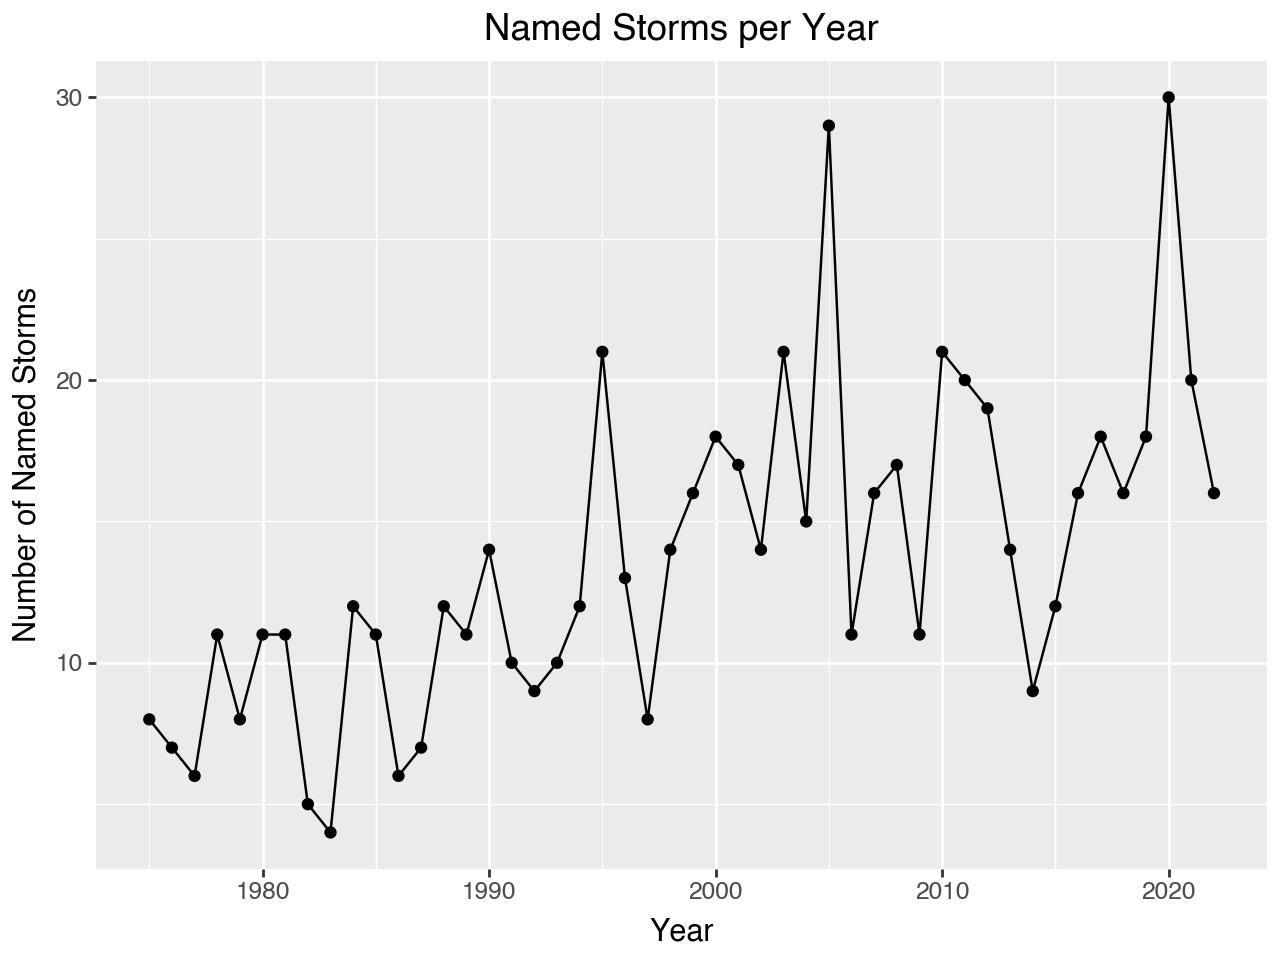

In [25]:
from plotnine import ggplot, aes, geom_line, labs, geom_point


#Tally the number of unique named storms per year
storms_per_year = storms.groupby('year').agg(count=('name','nunique')).reset_index()


#Plot with plotnine
plot = (ggplot(storms_per_year, aes(x='year', y='count'))+
        geom_line() +
        geom_point() + 
        labs(x='Year', y='Number of Named Storms', title='Named Storms per Year')
        )
plot

# We have more storms today than in the past

For each year in the dataset, tally the storms by category.

In [26]:
#Ensure 'category' is numeric (so missing stays as NaN)
storms['category'] = pd.to_numeric(storms['category'], errors='coerce')

#Drop missing categories (if you only want actual hurricane categories)
storms_cat = storms.dropna(subset=['category'])

#Tally unique storms by year and category
storms_by_category = (
    storms_cat
    .groupby(['year', 'category'])
    .agg(count = ('name', 'nunique'))
    .reset_index()
)

#Pivot to get categories as columns
storms_by_category_wide = storms_by_category.pivot(
    index = 'year',
    columns = 'category',
    values = 'count'
)
    

#Inspect the long‐format tally:
print(storms_by_category)

#Inspect the wide‐format tally:
print(storms_by_category_wide)

     year  category  count
0    1975         1      6
1    1975         2      5
2    1975         3      3
3    1975         4      1
4    1976         1      6
..    ...       ...    ...
188  2022         1      9
189  2022         2      4
190  2022         3      3
191  2022         4      2
192  2022         5      1

[193 rows x 3 columns]
category     1    2    3    4    5
year                              
1975       6.0  5.0  3.0  1.0  NaN
1976       6.0  4.0  2.0  NaN  NaN
1977       5.0  1.0  1.0  1.0  1.0
1978       5.0  3.0  2.0  2.0  NaN
1979       5.0  3.0  2.0  2.0  1.0
1980       9.0  5.0  2.0  1.0  1.0
1981       7.0  4.0  3.0  1.0  NaN
1982       2.0  1.0  1.0  1.0  NaN
1983       3.0  1.0  1.0  NaN  NaN
1984       5.0  2.0  1.0  1.0  NaN
1985       7.0  3.0  3.0  1.0  NaN
1986       4.0  1.0  NaN  NaN  NaN
1987       3.0  1.0  1.0  NaN  NaN
1988       5.0  3.0  3.0  3.0  1.0
1989       7.0  4.0  2.0  2.0  1.0
1990       8.0  3.0  1.0  NaN  NaN
1991       4.0  3.0  2

For each year in the dataset, find the maximum wind speed per status level.

In [27]:
#Ensure 'status' is treated as a category
storms['status'] = storms['status'].astype('category')

#Group by year and status, then compute the max wind speed in each group
max_wind_by_year_status = (
    storms
    .groupby(['year', 'status'], observed=True)
    .agg(max_wind = ('wind', 'max'))
    .reset_index()
)

#Note: Groupby on a categorical will produce all combinations of year and every possible status ... even those that never actually occur, 
# to prevent this we set observed=True


#Inspect the result
print(max_wind_by_year_status.head(20))

    year                  status  max_wind
0   1975           extratropical        75
1   1975               hurricane       120
2   1975  subtropical depression        30
3   1975       subtropical storm        45
4   1975     tropical depression        30
5   1975          tropical storm        60
6   1976           extratropical        55
7   1976               hurricane       105
8   1976     tropical depression        30
9   1976          tropical storm        60
10  1977           extratropical        60
11  1977               hurricane       150
12  1977  subtropical depression        25
13  1977       subtropical storm        45
14  1977     tropical depression        30
15  1977          tropical storm        60
16  1978           extratropical        45
17  1978               hurricane       120
18  1978  subtropical depression        30
19  1978       subtropical storm        35


For each storm, summarize its average location in latitude / longitude coordinates.

In [28]:
# Group by storm name and compute average latitude & longitude
avg_location = (
 storms
 .groupby('name', as_index=False)
 .agg(
        avg_latitude=('lat', 'mean'),
        avg_longitude=('long', 'mean')
 )
)

# Inspect the result
print(avg_location)

         name  avg_latitude  avg_longitude
0    AL011993     25.745455     -75.218182
1    AL012000     20.850000     -93.100000
2    AL021992     26.660000     -84.480000
3    AL021994     33.616667     -79.733333
4    AL021999     20.425000     -96.400000
..        ...           ...            ...
255     Vince     34.673333     -15.620000
256     Wanda     38.405556     -48.566667
257   Wilfred     12.723529     -34.982353
258     Wilma     22.908333     -79.775000
259      Zeta     23.824590     -60.547541

[260 rows x 3 columns]


For each storm, summarize its duration in number of hours (to the nearest 6hr increment).

In [29]:
#Create a datetime column from year, month, day, hour
storms['datetime'] = pd.to_datetime(
    storms[['year', 'month', 'day', 'hour']]
)

#For each storm, find the earliest and latest observation
duration = (
  storms
  .groupby('name', as_index=False)
    .agg(
            min_time=('datetime', 'min'),
            max_time=('datetime', 'max')
        )
)

#Compute duration in hours
duration['duration_hours'] = (
   (duration['max_time'] - duration['min_time']).dt.total_seconds() / 3600
)

#Round to the nearest 6‑hour increment
duration['duration_6hr_increment'] = (duration['duration_hours'].round(-1) // 6 * 6 )

# Select the summary columns
storm_durations = duration[['name', 'duration_hours', 'duration_6hr_increment']]

#Inspect the result
print(storm_durations)

         name  duration_hours  duration_6hr_increment
0    AL011993            60.0                    60.0
1    AL012000            18.0                    18.0
2    AL021992            24.0                    18.0
3    AL021994            24.0                    18.0
4    AL021999            12.0                     6.0
..        ...             ...                     ...
255     Vince            78.0                    78.0
256     Wanda           318.0                   318.0
257   Wilfred            96.0                    96.0
258     Wilma           264.0                   258.0
259      Zeta        130032.0                130026.0

[260 rows x 3 columns]


For storm in a category, create a variable `storm_number` that enumerates the storms 1, 2, ... (in date order).

In [30]:
#Load the storms data
url = (
    "https://raw.githubusercontent.com/"
    "tidyverse/dplyr/master/data-raw/storms.csv"
)
storms = pd.read_csv(url)

#Coerce category to numeric (so blanks → NaN) and drop storms with no category
storms['category'] = pd.to_numeric(storms['category'], errors='coerce').astype('Int64')

#Build a datetime column for ordering
storms['datetime'] = pd.to_datetime(
    dict(
        year=storms['year'],
        month=storms['month'],
        day=storms['day'],
        hour=storms['hour']
    )
)

#Summarize each storm’s start time and its (max) category
storm_meta = (
    storms
    .groupby('name', as_index=False)
    .agg(
        start_time    = ('datetime', 'min'),
        storm_category= ('category','max')
    )
    # drop any storms that never reached a hurricane category
    .dropna(subset=['storm_category'])
)
storm_meta['storm_category'] = storm_meta['storm_category'].astype(int)

#Sort by category, then by start_time
storm_meta = storm_meta.sort_values(['storm_category','start_time'])

#Within each category, enumerate storms in date order
storm_meta['storm_number'] = storm_meta.groupby('storm_category').cumcount() + 1

#Merge the storm_number back onto every observation
storms = storms.merge(
    storm_meta[['name','storm_number']],
    on='name',
    how='left'
)

# Now `storms` has a `storm_number` column that runs 1,2,3… within each category
# Verify:
print(storm_meta.head(10))
print(storms[['name','category','datetime','storm_number']].drop_duplicates())
print(storms[['name','category','datetime','storm_number']])

        name          start_time  storm_category  storm_number
60   Blanche 1975-07-24 00:00:00               1             1
64   Candice 1976-08-18 12:00:00               1             2
144    Holly 1976-10-22 18:00:00               1             3
52      Babe 1977-09-03 06:00:00               1             4
71     Clara 1977-09-05 12:00:00               1             5
89   Dorothy 1977-09-26 18:00:00               1             6
106   Evelyn 1977-10-13 18:00:00               1             7
74      Cora 1978-08-07 12:00:00               1             8
181   Kendra 1978-10-28 18:00:00               1             9
142    Henri 1979-09-15 00:00:00               1            10
         name  category            datetime  storm_number
0         Amy      <NA> 1975-06-27 00:00:00           NaN
1         Amy      <NA> 1975-06-27 06:00:00           NaN
2         Amy      <NA> 1975-06-27 12:00:00           NaN
3         Amy      <NA> 1975-06-27 18:00:00           NaN
4         Amy    

Convert year, month, day, hour into the variable `timestamp` using the `lubridate` package. Although the new package `clock` just came out, `lubridate` still seems to be standard. Next year I'll probably switch the class to be using `clock`.

In [31]:
#Use pandas' to_datetime on a dict of the separate columns
storms['timestamp'] = pd.to_datetime({
    'year': storms['year'],
    'month': storms['month'],
    'day': storms['day'],
    'hour': storms['hour']
})

# Verify
print(storms[['year','month','day','hour','timestamp']].head())

   year  month  day  hour           timestamp
0  1975      6   27     0 1975-06-27 00:00:00
1  1975      6   27     6 1975-06-27 06:00:00
2  1975      6   27    12 1975-06-27 12:00:00
3  1975      6   27    18 1975-06-27 18:00:00
4  1975      6   28     0 1975-06-28 00:00:00


Create new variables `day_of_week` which is a factor with levels "Sunday", "Monday", ... "Saturday" and `week_of_year` which is integer 1, 2, ..., 52.

In [32]:
#Create day_of_week as an ordered categorical (Sunday → Saturday)
dow_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
storms['day_of_week'] = pd.Categorical(
    storms['timestamp'].dt.day_name(),
    categories=dow_order,
    ordered=True
)

# Create week_of_year as the ISO week number (1–52/53)
storms['week_of_year'] = storms['timestamp'].dt.isocalendar().week

#Verify
print(storms[['timestamp','day_of_week','week_of_year']].head())

            timestamp day_of_week  week_of_year
0 1975-06-27 00:00:00      Friday            26
1 1975-06-27 06:00:00      Friday            26
2 1975-06-27 12:00:00      Friday            26
3 1975-06-27 18:00:00      Friday            26
4 1975-06-28 00:00:00    Saturday            26


For each storm, summarize the day in which is started in the following format "Friday, June 27, 1975".

In [33]:
#For each storm, find its start time (earliest timestamp)
start_times = (
    storms
    .groupby('name', as_index=False)
    .agg(start_time=('timestamp', 'min'))
)

#Format that start_time into "Friday, June 27, 1975"
start_times['start_day'] = (
    start_times['start_time'].dt.day_name() + ", "
    + start_times['start_time'].dt.month_name() + " "
    + start_times['start_time'].dt.day.astype(str) + ", "
    + start_times['start_time'].dt.year.astype(str)
)

#Inspect the result
print(start_times[['name', 'start_day']].head())

       name                 start_day
0  AL011993      Monday, May 31, 1993
1  AL012000   Wednesday, June 7, 2000
2  AL021992   Thursday, June 25, 1992
3  AL021994  Wednesday, July 20, 1994
4  AL021999      Friday, July 2, 1999


Create a new factor variable `decile_windspeed` by binning wind speed into 10 bins.

In [34]:
# Create decile labels 1–10, pd.qcut will bin into 10 quantile‐based groups
storms['decile_windspeed'] = pd.qcut(
   storms['wind'],
   q = 10,
   labels = range(1, 11)
)

#Convert to a categorical dtype (ordered)
storms['decile_windspeed'] = pd.Categorical(
    storms['decile_windspeed'],
    ordered=True
)

#Verify
print(storms[['wind', 'decile_windspeed']].head(10))

   wind decile_windspeed
0    25                1
1    25                1
2    25                1
3    25                1
4    25                1
5    25                1
6    25                1
7    30                2
8    35                3
9    40                4


Create a new data frame `serious_storms` which are category 3 and above hurricanes.

In [35]:
#Coerce 'category' to numeric so that non‑hurricanes become NaN
storms['category'] = pd.to_numeric(storms['category'], errors='coerce')

#Filter to only category 3, 4, or 5 storms
serious_storms = storms[storms['category'].isin([3,4,5])]

#Inspect
print(f"Found {serious_storms['name'].nunique()} category 3+ storms")
print(serious_storms[['name','status','category','wind']].head())

Found 111 category 3+ storms
         name     status  category  wind
77   Caroline  hurricane         3   100
78   Caroline  hurricane         3   100
152    Eloise  hurricane         3   105
153    Eloise  hurricane         3   110
215    Gladys  hurricane         3   100


In `serious_storms`, merge the variables lat and long together into `lat_long` with values `lat / long` as a string.

In [36]:
# 1. Merge lat & long into a single string column "lat_long"
serious_storms['lat_long'] = (
 serious_storms['lat'].astype(str) + " / " + serious_storms['long'].astype(str)
)

# 2. Inspect the new column
print(serious_storms[['lat', 'long', 'lat_long']].head())

      lat  long      lat_long
77   24.0 -97.0  24.0 / -97.0
78   24.1 -97.5  24.1 / -97.5
152  28.4 -87.3  28.4 / -87.3
153  30.2 -86.3  30.2 / -86.3
215  31.0 -73.0  31.0 / -73.0


/var/folders/02/jg9_m6811jsf3kzckqrtm9080000gn/T/ipykernel_56513/101256342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Let's return now to the original storms data frame. For each category, find the average wind speed, pressure and diameters (do not count the NA's in your averaging).

In [37]:
#Ensure 'category' is numeric (so non‑hurricanes become NaN)
storms['category'] = pd.to_numeric(storms['category'], errors='coerce')

#Drop rows with missing category (so we only average actual Saffir–Simpson categories)
storms_cat = storms.dropna(subset=['category'])

#Group by category and compute means (skipna=True by default)
category_summary = (
  storms_cat
  .groupby('category', as_index=False)
  .agg(
        avg_wind = ('wind', 'mean'),
        avg_pressure = ('pressure', 'mean'),
        avg_tropicalstorm_diameter = ('tropicalstorm_force_diameter', 'mean'),
        avg_hurricane_diameter = ('hurricane_force_diameter', 'mean')
    )
)


# 5. View the result
print(category_summary)

   category    avg_wind  avg_pressure  avg_tropicalstorm_diameter  \
0         1   70.973312    981.198980                  247.917821   
1         2   89.456193    967.311178                  254.631336   
2         3  104.300169    954.531197                  260.927835   
3         4  121.844485    940.019892                  268.148148   
4         5  146.465517    918.172414                  260.307692   

   avg_hurricane_diameter  
0               49.699908  
1               70.737327  
2               74.965636  
3               81.481481  
4               90.692308  


For each named storm, find its maximum category, wind speed, pressure and diameters (do not allow the max to be NA) and the number of readings (i.e. observations).

In [38]:
import pandas as pd

# 1. Load the raw storms data
url = "https://raw.githubusercontent.com/tidyverse/dplyr/master/data-raw/storms.csv"
storms = pd.read_csv(url)

# 2. Coerce category to numeric (bad/missing → NaN)
storms['category'] = pd.to_numeric(storms['category'], errors='coerce')

# 3. Drop any rows where category, wind, pressure or either diameter is missing
cols_to_keep = [
    'category',
    'wind',
    'pressure',
    'tropicalstorm_force_diameter',
    'hurricane_force_diameter'
]
storms_clean = storms.dropna(subset=cols_to_keep)

# 4. Now summarize per storm
summary = storms_clean.groupby('name', as_index=False).agg(
    max_category                 = ('category',                   'max'),
    max_wind                     = ('wind',                       'max'),
    max_pressure                 = ('pressure',                   'max'),
    max_tropicalstorm_diameter   = ('tropicalstorm_force_diameter','max'),
    max_hurricane_diameter       = ('hurricane_force_diameter',   'max'),
    n_readings                   = ('name',                       'size')
)

# 5. If you want max_category as an integer:
summary['max_category'] = summary['max_category'].astype(int)

print(summary.head())

     name  max_category  max_wind  max_pressure  max_tropicalstorm_diameter  \
0    Alex             3       105           986                       380.0   
1  Arthur             2        85           987                       220.0   
2   Barry             1        65           993                       220.0   
3  Bertha             3       110          1001                       330.0   
4   Beryl             1        70           995                        50.0   

   max_hurricane_diameter  n_readings  
0                    70.0          26  
1                    90.0          11  
2                    40.0           2  
3                    75.0          34  
4                    10.0           5  


Calculate the distance from each storm observation to Miami in a new variable `distance_to_miami`. This is very challenging. You will need a function that computes distances from two sets of latitude / longitude coordinates. 

In [39]:
#Define a vectorized Haversine function (returns distance in kilometers)
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great‐circle distance between two points 
    on the Earth (specified in decimal degrees) using the Haversine formula.
    """
    # convert decimal degrees to radians 
    φ1, φ2 = np.radians(lat1), np.radians(lat2)
    Δφ    = np.radians(lat2 - lat1)
    Δλ    = np.radians(lon2 - lon1)

    a = np.sin(Δφ/2)**2 + np.cos(φ1) * np.cos(φ2) * np.sin(Δλ/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    R = 6371  # Earth radius in kilometers
    return R * c

# 3. Miami’s coordinates
miami_lat, miami_lon = 25.7617, -80.1918

# 4. Compute distance for every observation
storms['distance_to_miami_km'] = haversine(
    storms['lat'], storms['long'],
    miami_lat, miami_lon
)

#also in miles
storms['distance_to_miami_miles'] = storms['distance_to_miami_km'] * 0.621371

# 5. Verify
print(storms[['lat','long','distance_to_miami_km','distance_to_miami_miles']].head())

    lat  long  distance_to_miami_km  distance_to_miami_miles
0  27.5 -79.0            226.699423               140.864447
1  28.5 -79.0            326.521434               202.890950
2  29.5 -79.0            431.932395               268.390264
3  30.5 -79.0            539.667181               335.333536
4  31.5 -78.8            652.346208               405.349016


For each storm observation, use the function from the previous question to calculate the distance it moved since the previous observation.

In [40]:
#Create a proper timestamp for ordering
storms['timestamp'] = pd.to_datetime({
    'year':  storms['year'],
    'month': storms['month'],
    'day':   storms['day'],
    'hour':  storms['hour']
})

#Sort by storm name and time
storms = storms.sort_values(['name', 'timestamp'])

#Shift lat/long within each storm to get the previous observation
storms['prev_lat']  = storms.groupby('name')['lat'].shift(1)
storms['prev_long'] = storms.groupby('name')['long'].shift(1)

#Compute distance moved since the previous observation
storms['distance_moved_km'] = haversine(
    storms['prev_lat'], storms['prev_long'],
    storms['lat'], storms['long']
)

#Fill NaN for the first observation of each storm with 0
storms['distance_moved_km'] = storms['distance_moved_km'].fillna(0)

#Inspect the result
print(storms[['name','timestamp','prev_lat','prev_long','distance_moved_km']].head())

          name           timestamp  prev_lat  prev_long  distance_moved_km
4544  AL011993 1993-05-31 12:00:00       NaN        NaN           0.000000
4545  AL011993 1993-05-31 18:00:00      21.5      -84.0         224.695997
4546  AL011993 1993-06-01 00:00:00      22.3      -82.0         201.004929
4547  AL011993 1993-06-01 06:00:00      23.2      -80.3         195.892183
4548  AL011993 1993-06-01 12:00:00      24.5      -79.0         181.338354


For each storm, find the total distance it moved over its observations and its total displacement. "Distance" is a scalar quantity that refers to "how much ground an object has covered" during its motion. "Displacement" is a vector quantity that refers to "how far out of place an object is"; it is the object's overall change in position.

In [41]:
#Compute distance moved between consecutive observations
storms['prev_lat']  = storms.groupby('name')['lat'].shift(1)
storms['prev_long'] = storms.groupby('name')['long'].shift(1)
storms['distance_moved_km'] = haversine(
    storms['prev_lat'], storms['prev_long'],
    storms['lat'],        storms['long']
).fillna(0)

#Summarize per storm: total distance and displacement
summary = (
    storms
    .groupby('name', as_index=False)
    .agg(
        total_distance_km = ('distance_moved_km', 'sum'),
        start_lat         = ('lat',               'first'),
        start_long        = ('long',              'first'),
        end_lat           = ('lat',               'last'),
        end_long          = ('long',              'last')
    )
)

#Compute displacement (straight‐line distance from start to end)
summary['displacement_km'] = haversine(
    summary['start_lat'], summary['start_long'],
    summary['end_lat'], summary['end_long']
)

#Drop the start/end coords if you only want the metrics
storm_movement = summary[['name', 'total_distance_km', 'displacement_km']]

print(storm_movement.head())

       name  total_distance_km  displacement_km
0  AL011993        2080.702366      2046.444227
1  AL012000         104.913658        56.500155
2  AL021992         539.215150       514.510712
3  AL021994         394.607894       386.002387
4  AL021999         249.502307       240.890168


For each storm observation, calculate the average speed the storm moved in location.

In [42]:
#Compute distance moved between consecutive observations
storms['prev_lat']       = storms.groupby('name')['lat'].shift(1)
storms['prev_long']      = storms.groupby('name')['long'].shift(1)
storms['distance_km']    = haversine(
    storms['prev_lat'], storms['prev_long'],
    storms['lat'],       storms['long']
).fillna(0)

#Compute time difference (in hours) since previous observation
storms['prev_time']      = storms.groupby('name')['timestamp'].shift(1)
storms['time_diff_hr']   = (
    (storms['timestamp'] - storms['prev_time'])
    .dt.total_seconds() / 3600
).fillna(0)

#Calculate average speed (km/h) for each observation
storms['avg_speed_kmh'] = storms['distance_km'] / storms['time_diff_hr']

#Handle the first observation of each storm (where time_diff_hr is 0)
storms.loc[storms['time_diff_hr'] == 0, 'avg_speed_kmh'] = 0

#Inspect the result
print(storms[['name','timestamp','distance_km','time_diff_hr','avg_speed_kmh']].head(10))

          name           timestamp  distance_km  time_diff_hr  avg_speed_kmh
4544  AL011993 1993-05-31 12:00:00     0.000000           0.0       0.000000
4545  AL011993 1993-05-31 18:00:00   224.695997           6.0      37.449333
4546  AL011993 1993-06-01 00:00:00   201.004929           6.0      33.500822
4547  AL011993 1993-06-01 06:00:00   195.892183           6.0      32.648697
4548  AL011993 1993-06-01 12:00:00   181.338354           6.0      30.223059
4549  AL011993 1993-06-01 18:00:00   187.205886           6.0      31.200981
4550  AL011993 1993-06-02 00:00:00   191.286528           6.0      31.881088
4551  AL011993 1993-06-02 06:00:00   249.507927           6.0      41.584655
4552  AL011993 1993-06-02 12:00:00   197.945985           6.0      32.990998
4553  AL011993 1993-06-02 18:00:00   205.607405           6.0      34.267901


For each storm, calculate its average ground speed (how fast its eye is moving which is different from windspeed around the eye).

In [43]:
#Group by storm name and sum distance and time
storm_movement = (
    storms
    .groupby('name', as_index=False)
    .agg(
        total_distance_km = ('distance_km', 'sum'),
        total_time_hr     = ('time_diff_hr', 'sum')
    )
)

#Compute average ground speed (km/h)
storm_movement['avg_ground_speed_kmh'] = (
    storm_movement['total_distance_km'] / storm_movement['total_time_hr']
)

#Handle storms with only one observation (total_time_hr = 0)
storm_movement.loc[
    storm_movement['total_time_hr'] == 0, 'avg_ground_speed_kmh'] = np.nan
  
#Inspect the result
print(storm_movement[['name', 'avg_ground_speed_kmh']].head())

       name  avg_ground_speed_kmh
0  AL011993             34.678373
1  AL012000              5.828537
2  AL021992             22.467298
3  AL021994             16.441996
4  AL021999             20.791859


Is there a relationship between average ground speed and maximum category attained? Use a dataframe summary (not a regression).

In [44]:
#Compute maximum category per storm ---
storms['category'] = pd.to_numeric(storms['category'], errors='coerce').astype('Int64')
max_cat = (
    storms
    .groupby('name', as_index=False)
    .agg(max_category=('category', 'max'))
    .fillna(0)
)
max_cat['max_category'] = max_cat['max_category'].astype(int)

#Merge avg ground speed with max category ---
df = (storm_movement[['name', 'avg_ground_speed_kmh']].merge(max_cat, on='name', how='left'))

#Summarize relationship by max_category ---
relationship_summary = (
    df.groupby('max_category', as_index=False)
    .agg(
          n_storms=('name', 'size'),
          avg_speed=('avg_ground_speed_kmh', 'mean'),
          median_speed=('avg_ground_speed_kmh', 'median')
    )
    .sort_values('max_category')
)

print(relationship_summary)

   max_category  n_storms  avg_speed  median_speed
0             0        84  16.534196     15.918016
1             1        47  11.403669      0.175136
2             2        18  10.135244      5.837651
3             3        33   3.697033      0.192004
4             4        56   6.742332      0.209366
5             5        22   9.255917      0.263221


Now we want to transition to building real design matrices for prediction. This is more in tune with what happens in the real world. Large data dump and you convert it into $X$ and $y$ how you see fit.

Suppose we wish to predict the following: given the first three readings of a storm, can you predict its maximum wind speed? Identify the `y` and identify which features you need $x_1, ... x_p$ and build that matrix with `dplyr` functions. This is not easy, but it is what it's all about. Feel free to "featurize" as creatively as you would like. You aren't going to overfit if you only build a few features relative to the total 198 storms.

In [45]:
import pandas as pd
import numpy as np

#Load the raw storms data
url = "https://raw.githubusercontent.com/tidyverse/dplyr/master/data-raw/storms.csv"
storms = pd.read_csv(url)

#Build a proper timestamp and coerce numeric columns
storms['timestamp'] = pd.to_datetime({
    'year':  storms['year'],
    'month': storms['month'],
    'day':   storms['day'],
    'hour':  storms['hour']
})
storms['category'] = pd.to_numeric(storms['category'], errors='coerce')

#Drop any observation missing category or either diameter
storms_clean = storms.dropna(subset=[
    'category',
    'tropicalstorm_force_diameter',
    'hurricane_force_diameter'
]).copy()

#Sort by storm name & time
storms_clean = storms_clean.sort_values(['name','timestamp'])

#Keep only storms with at least 3 readings
counts = storms_clean.groupby('name').size()
valid_storms = counts[counts >= 3].index
storms_clean = storms_clean[storms_clean['name'].isin(valid_storms)]

#Define the target y: maximum wind per storm
y = (
    storms_clean
    .groupby('name')['wind']
    .max()
    .rename('max_wind')
)

#Feature engineering on the *first three* readings of each storm
first3 = (
    storms_clean
    .groupby('name')
    .head(3)
    .reset_index(drop=True)
)

#Aggregate features from those first 3 readings
features = (
    first3
    .groupby('name')
    .agg(
        wind_mean3            = ('wind',                         'mean'),
        pressure_mean3        = ('pressure',                     'mean'),
        ts_diameter_mean3     = ('tropicalstorm_force_diameter', 'mean'),
        hurr_diameter_mean3   = ('hurricane_force_diameter',    'mean'),
        category_first        = ('category',                     'first'),
        time_of_day_first_hr  = ('timestamp', 
                                 lambda x: x.dt.hour.iloc[0])
    )
)

#Merge X and y into one DataFrame
data = features.merge(y, left_index=True, right_index=True)

#Separate X and y
X = data.drop(columns='max_wind')
y = data['max_wind']

#Reset index
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

#Inspect shapes
print("X shape:", X.shape)
print("y shape:", y.shape)
print("\nFirst few rows of X:")
print(X.head())
print("\nFirst few values of y:")
print(y.head())

X shape: (100, 6)
y shape: (100,)

First few rows of X:
   wind_mean3  pressure_mean3  ts_diameter_mean3  hurr_diameter_mean3  \
0   80.000000      976.333333         141.666667            43.333333   
1   71.666667      984.000000         140.000000            16.666667   
2   81.666667      974.000000         160.000000            20.000000   
3   68.333333      992.000000          50.000000            10.000000   
4   73.333333      982.333333          96.666667            30.000000   

   category_first  time_of_day_first_hr  
0             1.0                     6  
1             1.0                     0  
2             1.0                     6  
3             1.0                     6  
4             1.0                     6  

First few values of y:
0    105
1     85
2    110
3     70
4    100
Name: max_wind, dtype: int64


Fit your model. Validate it.

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

#Instantiate the model
model = RandomForestRegressor(
    n_estimators=100, random_state = 42
)

#Fit on the training data
model.fit(X_train, y_train)

#Predict on the test set
y_pred = model.predict(X_test)

#Evaluate performance
mse   = mean_squared_error(y_test, y_pred)
r2    = r2_score(y_test, y_pred)
print(f"Test MSE:  {mse:.2f}")
print(f"Test R²:   {r2:.2f}")

#Cross‑validate (5‑fold) on the full dataset. We'll look at both MSE and R²
cv_mse_scores = -cross_val_score(
    model, X, y, scoring='neg_mean_squared_error', cv=5
)
cv_r2_scores  = cross_val_score(
    model,X, y, scoring='r2', cv=5
)


print("\n5‑Fold CV results:")
print(f"Mean CV MSE:  {cv_mse_scores.mean():.2f} ± {cv_mse_scores.std():.2f}")
print(f"Mean CV R²:   {cv_r2_scores.mean():.2f} ± {cv_r2_scores.std():.2f}")

Test MSE:  539.62
Test R²:   -0.07

5‑Fold CV results:
Mean CV MSE:  579.76 ± 129.11
Mean CV R²:   0.09 ± 0.14


Assess your level of success at this endeavor.

It is not successful because the rsq is very low and it could be because the features that I choose have very limited predictive power of maximum wind speed.

# More data munging with table joins

We will be using the `storms` dataset from the `dplyr` package. Filter this dataset on all storms that have no missing measurements for the two diameter variables, "tropicalstorm_force_diameter" and "hurricane_force_diameter". Zeroes count as missing as well.

In [47]:
import pandas as pd

#Load the storms data from dplyr’s GitHub
url = (
    "https://raw.githubusercontent.com/"
    "tidyverse/dplyr/master/data-raw/storms.csv"
)
storms = pd.read_csv(url)

#Filter out rows where either diameter is missing or zero
filtered = storms.loc[
    storms['tropicalstorm_force_diameter'].notna()
    & (storms['tropicalstorm_force_diameter'] != 0)
    & storms['hurricane_force_diameter'].notna()
    & (storms['hurricane_force_diameter'] != 0)
].reset_index(drop=True)

#Inspect the result
print(f"Kept {len(filtered)} rows out of {len(storms)}")
print(filtered[['tropicalstorm_force_diameter','hurricane_force_diameter']].head())

Kept 2265 rows out of 19537
   tropicalstorm_force_diameter  hurricane_force_diameter
0                         130.0                      40.0
1                         130.0                      40.0
2                         165.0                      50.0
3                         155.0                      55.0
4                         195.0                      65.0


From this subset, create a data frame that only has storm name, observation period number for each storm (i.e., 1, 2, ..., T) and the "tropicalstorm_force_diameter" and "hurricane_force_diameter" metrics.

In [48]:
#Create a timestamp so we can order observations chronologically
filtered['timestamp'] = pd.to_datetime({
    'year':  filtered['year'],
    'month': filtered['month'],
    'day':   filtered['day'],
    'hour':  filtered['hour']
})

#Sort by storm name and time
filtered = filtered.sort_values(['name', 'timestamp'])

#Assign an observation period number within each storm
filtered['period'] = filtered.groupby('name').cumcount() + 1

#Select only the desired columns
result = filtered[[
    'name',
    'period',
    'tropicalstorm_force_diameter',
    'hurricane_force_diameter'
]]

#Inspect
print(result.head(10))

   name  period  tropicalstorm_force_diameter  hurricane_force_diameter
0  Alex       1                         130.0                      40.0
1  Alex       2                         130.0                      40.0
2  Alex       3                         165.0                      50.0
3  Alex       4                         155.0                      55.0
4  Alex       5                         195.0                      65.0
5  Alex       6                         195.0                      65.0
6  Alex       7                         225.0                      65.0
7  Alex       8                         225.0                      70.0
8  Alex       9                         300.0                      70.0
9  Alex      10                         380.0                      70.0


Create a data frame in long format with columns "diameter" for the measurement and "diameter_type" which will be categorical taking on the values "hu" or "ts".

In [49]:
#Melt into long format
long_df = result.melt(
    id_vars=['name', 'period'],
    value_vars=['tropicalstorm_force_diameter', 'hurricane_force_diameter'],
    var_name='diameter_type',
    value_name='diameter'
)

# Map the column names to 'ts' and 'hu' and make it categorical
long_df['diameter_type'] = long_df['diameter_type'].map({
    'tropicalstorm_force_diameter': 'ts',
    'hurricane_force_diameter':     'hu'
}).astype(pd.CategoricalDtype(categories=['ts', 'hu']))

# 4. Inspect
print(long_df.head())

   name  period diameter_type  diameter
0  Alex       1            ts     130.0
1  Alex       2            ts     130.0
2  Alex       3            ts     165.0
3  Alex       4            ts     155.0
4  Alex       5            ts     195.0


Using this long-formatted data frame, use a line plot to illustrate both "tropicalstorm_force_diameter" and "hurricane_force_diameter" metrics by observation period for four random storms using a 2x2 faceting. The two diameters should appear in two different colors and there should be an appropriate legend.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


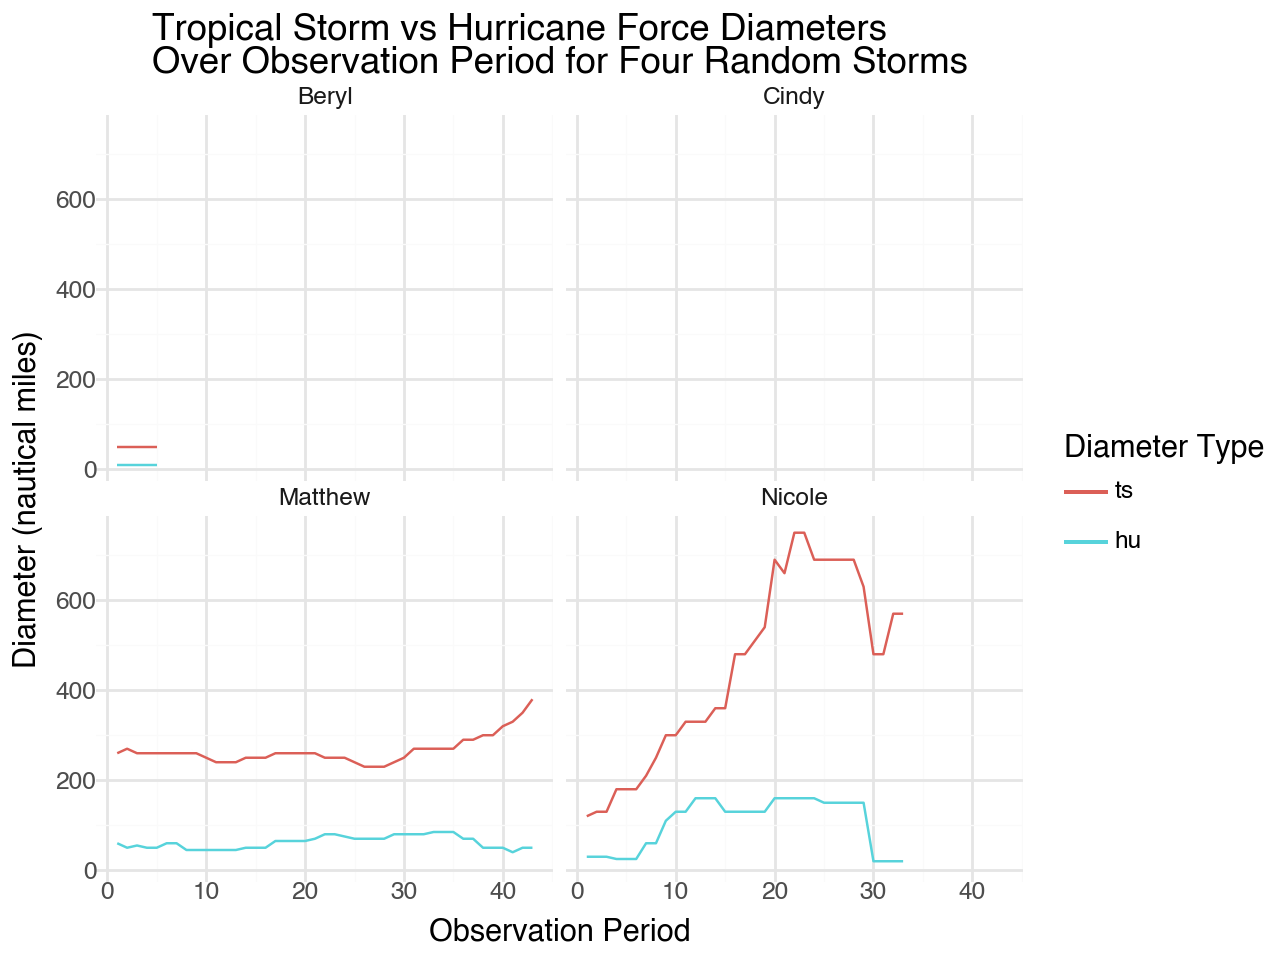

In [50]:
from plotnine import ggplot, aes, geom_line, facet_wrap, labs, theme_minimal
import numpy as np
#Pick four random storms
np.random.seed(42)
storm_names = long_df['name'].unique()
selected = np.random.choice(storm_names, size=4, replace=False)

#Subset to those four storms
plot_df = long_df[long_df['name'].isin(selected)].copy()

#Build the line‐plot with 2×2 faceting
plot = (
    ggplot(plot_df, aes(x='period', y='diameter',
                        color='diameter_type',
                        group='diameter_type')) + 
    geom_line() +
    facet_wrap('~name', ncol=2) +
    labs(
        x='Observation Period',
        y='Diameter (nautical miles)',
        color='Diameter Type',
        title='Tropical Storm vs Hurricane Force Diameters\nOver Observation Period for Four Random Storms'
    ) +
    theme_minimal()
)

plot